# Building Neural Networks

Neural networks are flexible models that can handle both classification and regression.

In this notebook you will:
- Fit a neural network using R-style formulas
- Inspect model structure and training performance
- Evaluate accuracy on a classification task
- Visualize the network and its learned weights


## Setup: Load the Breast Cancer Dataset

In [1]:
import cuanalytics as ca

In [2]:
# Load data and create train/test split
df = cuanalytics.load_breast_cancer_data()
train_df, test_df = cuanalytics.split_data(df, test_size=0.2, random_state=42)

# Scale numeric features (fit on train, apply to test)
train_df, scaler = cuanalytics.scale_data(train_df, exclude_cols=['diagnosis'])
test_df, _ = cuanalytics.scale_data(test_df, exclude_cols=['diagnosis'], scaler=scaler)
train_df.head()


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,diagnosis
68,-1.440753,-0.435319,-1.362085,-1.139118,0.780573,0.718921,2.823135,-0.119150,1.092662,2.458173,...,-0.476309,-1.247920,-0.973968,0.722894,1.186732,4.672828,0.932012,2.097242,1.886450,B
181,1.974096,1.733026,2.091672,1.851973,1.319843,3.426275,2.013112,2.665032,2.127004,1.558396,...,1.311279,2.081617,2.137405,0.761928,3.265601,1.928621,2.698947,1.891161,2.497838,M
63,-1.399982,-1.249622,-1.345209,-1.109785,-1.332645,-0.307355,-0.365558,-0.696502,1.930333,0.954379,...,-1.040811,-1.245220,-0.999715,-1.438693,-0.548564,-0.644911,-0.970239,0.597602,0.057894,B
248,-0.981797,1.416222,-0.982587,-0.866944,0.059390,-0.596788,-0.820203,-0.845115,0.313264,0.074041,...,1.593530,-0.873572,-0.742947,0.796624,-0.729392,-0.774950,-0.809483,0.798928,-0.134497,B
60,-1.117700,-1.010259,-1.125002,-0.965942,1.269511,-0.439002,-0.983341,-0.930600,3.394436,0.950213,...,-1.334616,-1.117138,-0.896549,-0.174876,-0.995079,-1.209146,-1.354582,1.033544,-0.205732,B


## Step 1: Build Your First Neural Network

We will start with a small network: 3 hidden layers with 3, 5, and 2 nodes.

In [ ]:
nn = cuanalytics.fit_nn(
    train_df,
    formula='diagnosis ~ .',
    hidden_layers=[3, 5, 2],
    activation='relu',
    solver='adam',
    max_iter=10000,
    random_state=42
)



Neural Network fitted successfully!
  Task type: classification
  Features: 30
  Training samples: 455
  Hidden layers: [3, 5, 2]
  Activation: relu
  Solver: adam


## Step 2: Model Summary

In [4]:
nn.summary()



NEURAL NETWORK MODEL SUMMARY
Task type: classification
Target: diagnosis
Features: 30
Hidden layers: [3, 5, 2]
Activation: relu
Solver: adam
Training samples: 455

Training Accuracy: 99.34%

Training Confusion Matrix:
          Pred B  Pred M
Actual B     286       0
Actual M       3     166

Kappa: 0.9858



## Step 3: Evaluate Performance

In [5]:
train_report = nn.score(train_df)
test_report = nn.score(test_df)

print(f"Train accuracy: {train_report['accuracy']:.2%}")
print(f"Test accuracy: {test_report['accuracy']:.2%}")



SCORE REPORT
Accuracy: 99.34%
Kappa: 0.9858

Confusion Matrix:
          Pred B  Pred M
Actual B     286       0
Actual M       3     166

Per-Class Metrics:
   precision  recall  sensitivity  specificity     f1
B     0.9896  1.0000       1.0000       0.9822 0.9948
M     1.0000  0.9822       0.9822       1.0000 0.9910

SCORE REPORT
Accuracy: 99.12%
Kappa: 0.9812

Confusion Matrix:
          Pred B  Pred M
Actual B      71       0
Actual M       1      42

Per-Class Metrics:
   precision  recall  sensitivity  specificity     f1
B     0.9861  1.0000       1.0000       0.9767 0.9930
M     1.0000  0.9767       0.9767       1.0000 0.9882
Train accuracy: 99.34%
Test accuracy: 99.12%


## Step 4: Visualize the Network

Weights are shown on the edges; green is positive, red is negative.

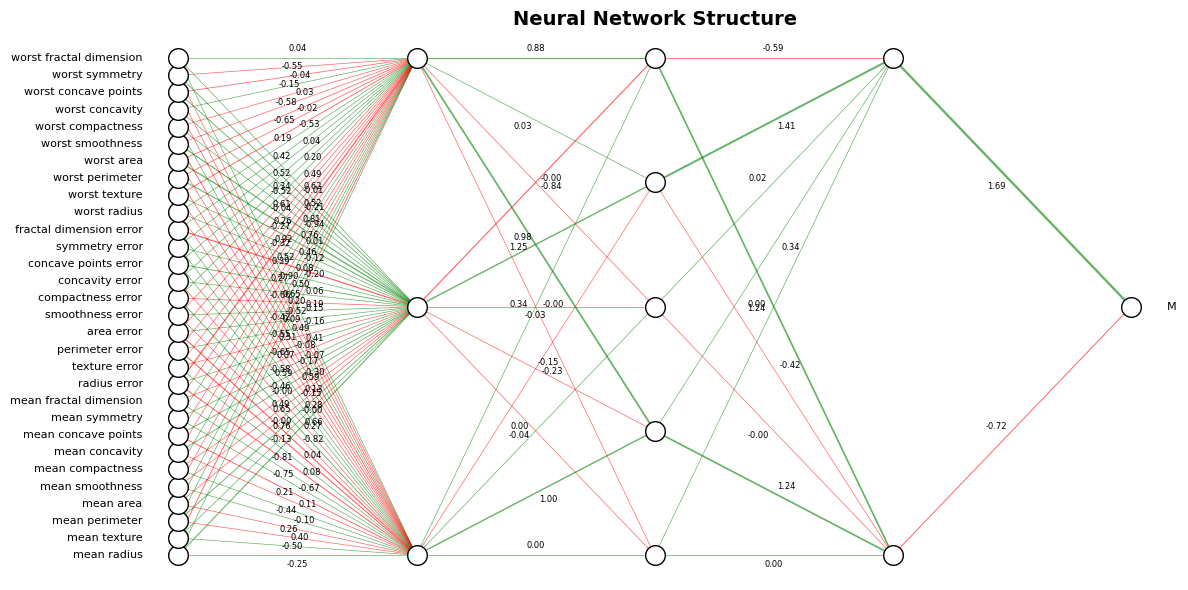

In [6]:
nn.visualize()


## 🎓 Final Challenge

- Try different hidden layer sizes (e.g., [10, 5] or [8, 8, 8]).
- Compare accuracy with logistic regression on the same dataset.
- Increase or decrease `max_iter` and see how training changes.

## Key Takeaways

- Neural networks can model complex, nonlinear relationships.
- Architecture (layer sizes) controls model flexibility.
- Visualization helps you see how weights connect layers.

## Real-World Considerations

- Feature scaling often improves convergence.
- Larger networks may overfit without regularization.
- Neural networks are less interpretable than linear models.